# CS584 Machine Learning
# Team Members:
Vishwa Babariya - A20516499

Shraddha Kadiya - A20520127 

Bhaktiben Kadiya - A20518731

# Dataset: 
	Breast Cancer Wisconsin (Diagnostic) Data Set



# Objective: 
	To predict whether breast cancer is benign or malignant



# Context: 
	Early detection is crucial for effective treatment and improved outcomes in breast cancer



# Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv("data.csv")
#Data Information
print("Data Information:\n")
print(data.info())

Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimet

In [2]:
#First 5 rows of data
print("First 5 Rows:\n")
print(data.head(5))

First 5 Rows:

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_wo

In [3]:
#Dropping the "id" column and "Unnamed: 32" (last column)
data=data.iloc[:,1:32]
print("First 5 rows after removing the last column:\n")
print(data.head(5))
data.to_csv("final_data.csv",index=False)

First 5 rows after removing the last column:

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0    

In [4]:
#Checking for any missing values
print("Missing Values:\n")
print(data.isnull().sum())

Missing Values:

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
#Finding any duplicate values
print("Duplicate values: ",data.duplicated().sum())
#Rows and Columns
print("Shape of dataset: ",data.shape)

Duplicate values:  0
Shape of dataset:  (569, 31)


In [6]:
#Statistics summary
print("Statistics Summary:\n")
print(data.describe())

Statistics Summary:

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

Count:
diagnosis
B    357
M    212
Name: count, dtype: int64


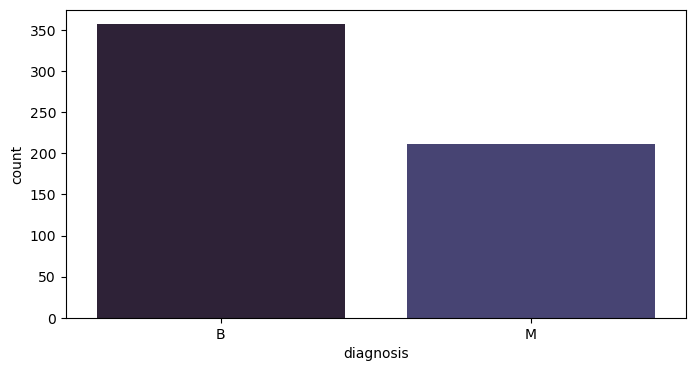

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
#Plotting the value counts of diagnosis column where cancer can be either malignant or benign
diagnosis_count=sns.countplot(data,x="diagnosis",order=data["diagnosis"].value_counts().index,palette=sns.color_palette("mako"))

print("Count:")
print(data["diagnosis"].value_counts())

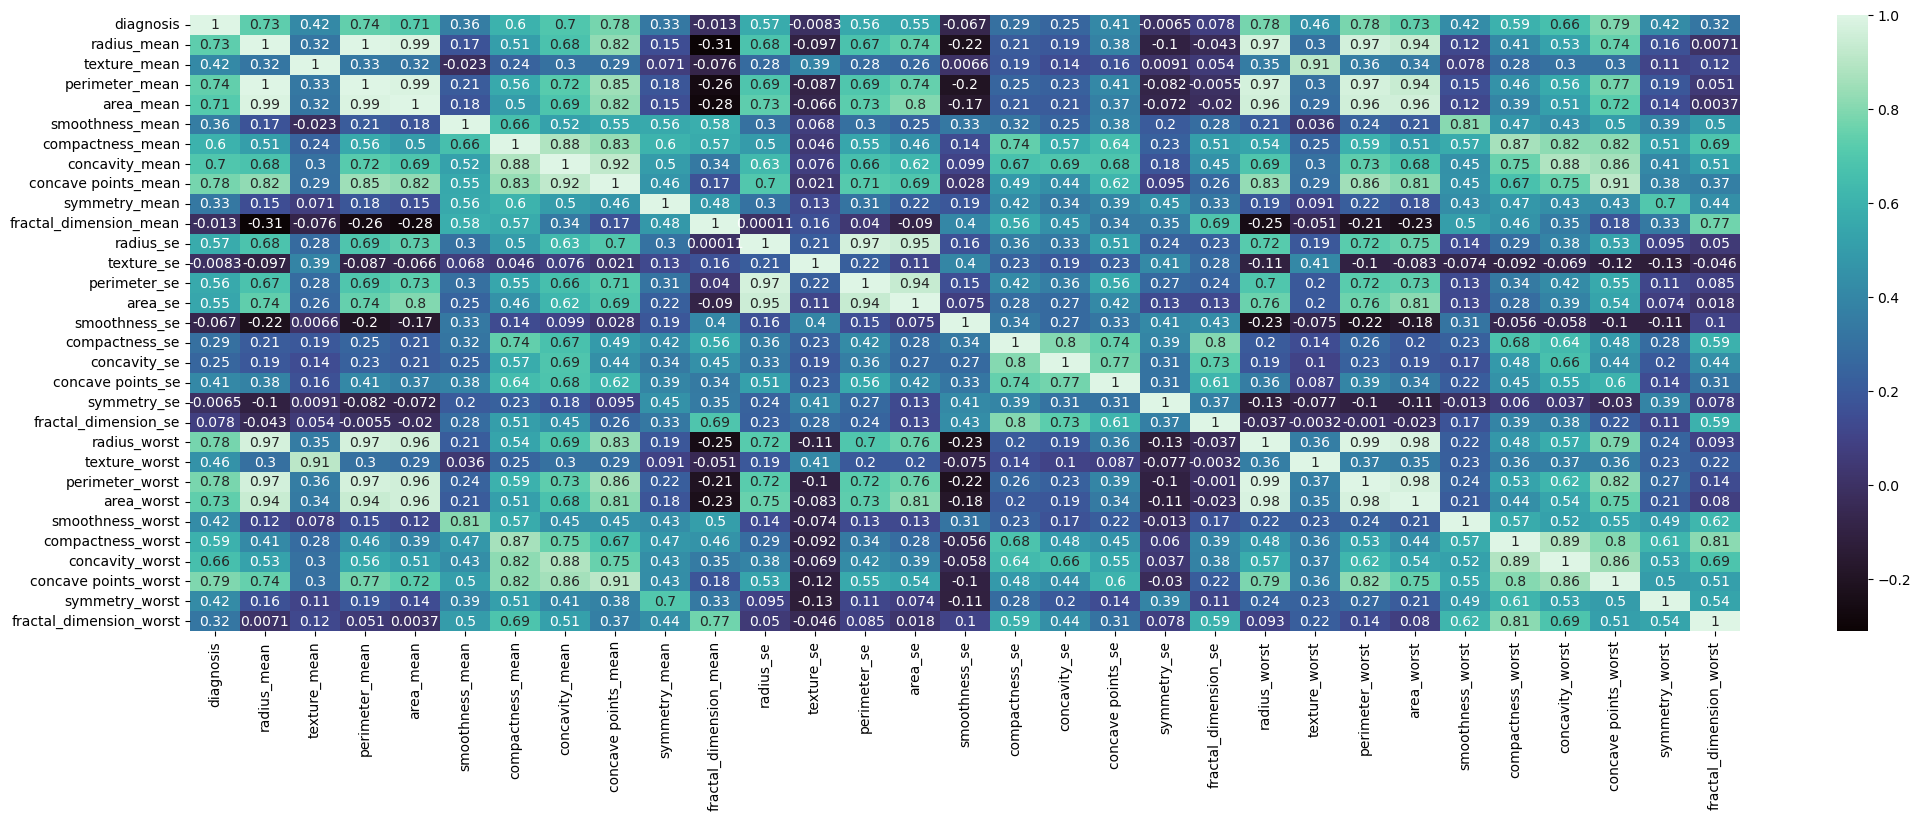

In [8]:
#Correlation between features
data["diagnosis"]=data["diagnosis"].map({"B":0,"M":1})
cm=data.corr()
plt.figure(figsize=(25,8))
corr_feat=sns.heatmap(cm,cmap="mako",annot=True)

In [9]:
#Features that have a great impact on the target diagnosis (univariate selection)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
xdata=data.drop(["diagnosis"],axis=1)
ydata=data["diagnosis"]
bfeat=SelectKBest(score_func=chi2,k=10)
bfeat_fit=bfeat.fit(xdata,ydata)
bfeat_score=pd.DataFrame(bfeat_fit.scores_)
cols=pd.DataFrame(xdata.columns)
feat_wgts=pd.concat([cols,bfeat_score],axis=1)
feat_wgts.columns=["Feature","Score"]
print(feat_wgts)
print("\nTop 10 Features:\n")
print(feat_wgts.nlargest(10,"Score"))
#area_worst is the most important feature since it has the highest score
print("\nBottom 10 Features:\n")
print(feat_wgts.nsmallest(10,"Score"))

                    Feature          Score
0               radius_mean     266.104917
1              texture_mean      93.897508
2            perimeter_mean    2011.102864
3                 area_mean   53991.655924
4           smoothness_mean       0.149899
5          compactness_mean       5.403075
6            concavity_mean      19.712354
7       concave points_mean      10.544035
8             symmetry_mean       0.257380
9    fractal_dimension_mean       0.000074
10                radius_se      34.675247
11               texture_se       0.009794
12             perimeter_se     250.571896
13                  area_se    8758.504705
14            smoothness_se       0.003266
15           compactness_se       0.613785
16             concavity_se       1.044718
17        concave points_se       0.305232
18              symmetry_se       0.000080
19     fractal_dimension_se       0.006371
20             radius_worst     491.689157
21            texture_worst     174.449400
22         

[0.04030188 0.02178182 0.09082636 0.04387491 0.01123026 0.02288342
 0.06840792 0.06286239 0.00792555 0.00753994 0.01784907 0.00586568
 0.0173238  0.04447881 0.00672627 0.00897862 0.00989044 0.01057653
 0.00549084 0.00697177 0.08913998 0.02628271 0.09210432 0.08439089
 0.01994055 0.03172715 0.04389982 0.06899048 0.01842095 0.01331686]


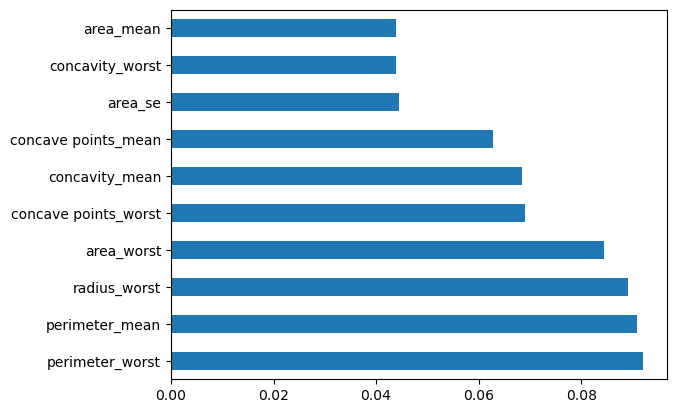

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(xdata,ydata)
print(model.feature_importances_)
feat_importances=pd.Series(model.feature_importances_,index=xdata.columns)
feat_importances.nlargest(10).plot(kind="barh")
plt.show()

/Users/bhakti/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

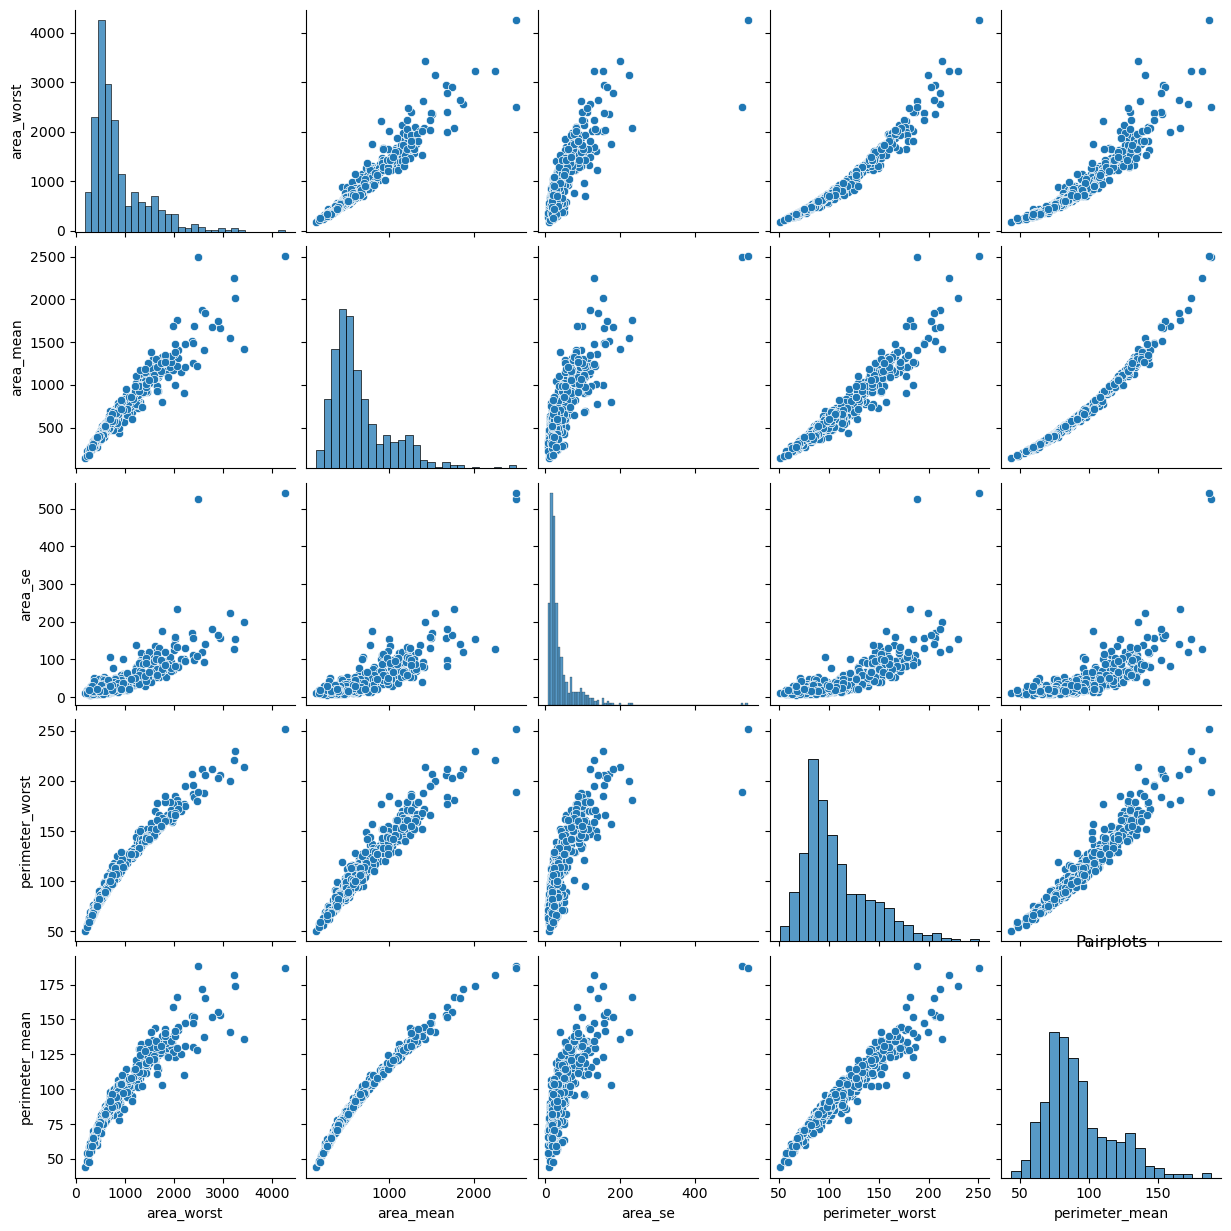

In [11]:
#Pairplots for the top 5 features found through univariate selection
fnames=["area_worst","area_mean","area_se","perimeter_worst","perimeter_mean"]
plt.figure(figsize=(15,5))
sns.pairplot(data[fnames])
plt.title("Pairplots")
plt.show()

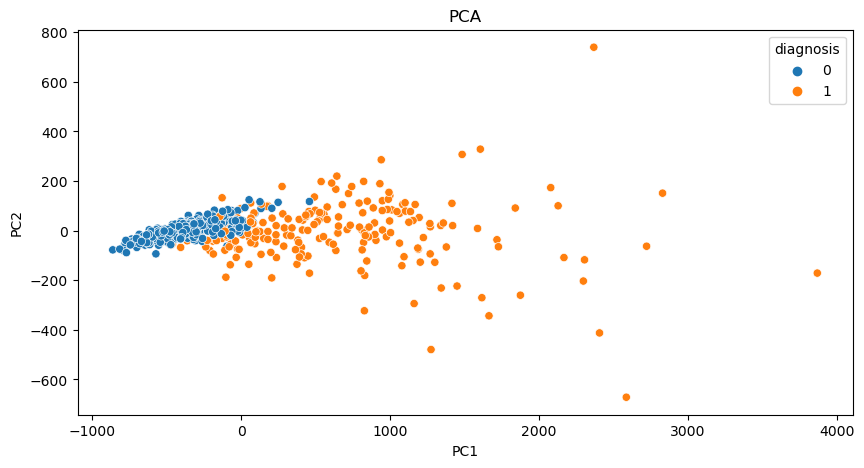

In [12]:
from sklearn.decomposition import PCA
#PCA
pca=PCA(n_components=2)
pcomp=pca.fit_transform(xdata)
pca_df=pd.DataFrame(data=pcomp,columns=["PC1","PC2"])
pca_df["diagnosis"]=ydata
plt.figure(figsize=(10,5))
sns.scatterplot(x="PC1",y="PC2",hue="diagnosis",data=pca_df)
plt.title("PCA")
plt.show()

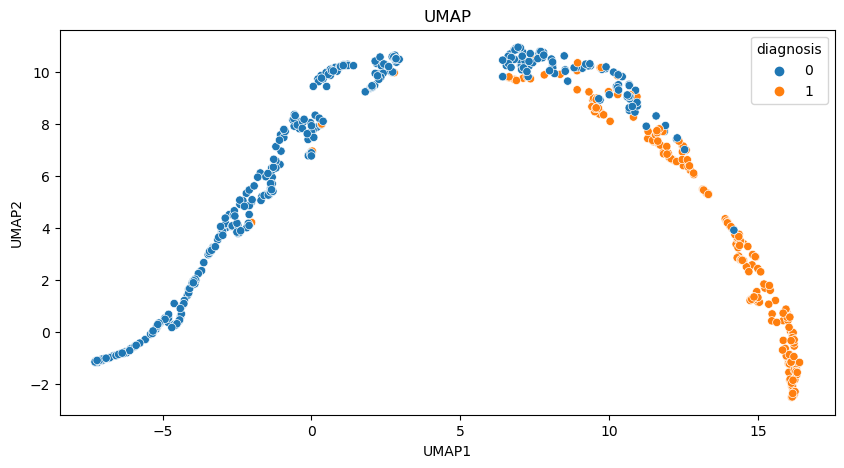

In [13]:
from umap import UMAP
#UMAP
umap=UMAP(n_components=2)
umapcomp= umap.fit_transform(xdata)
umap_df=pd.DataFrame(data=umapcomp,columns=["UMAP1","UMAP2"])
umap_df["diagnosis"]=ydata
plt.figure(figsize=(10,5))
sns.scatterplot(x="UMAP1",y="UMAP2",hue="diagnosis",data=umap_df)
plt.title("UMAP")
plt.show()

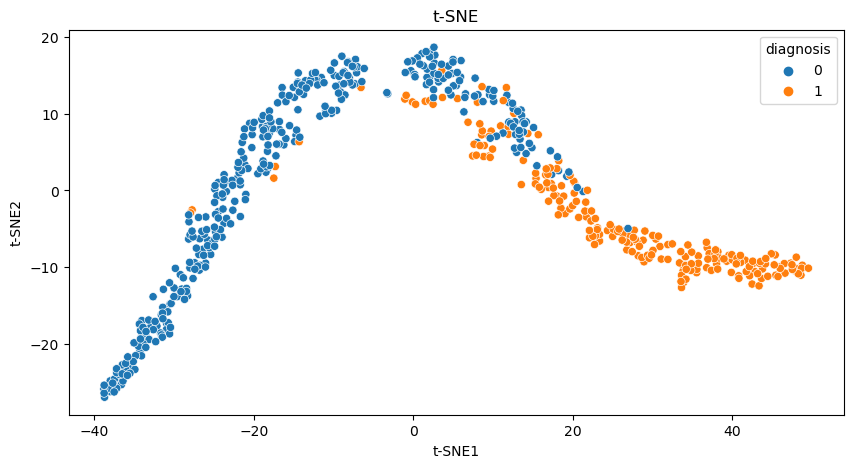

In [14]:
from sklearn.manifold import TSNE
#TSNE
tsne=TSNE(n_components=2)
tsnecomp=tsne.fit_transform(xdata)
tsne_df=pd.DataFrame(data=tsnecomp,columns=["t-SNE1","t-SNE2"])
tsne_df["diagnosis"]=ydata
plt.figure(figsize=(10,5))
sns.scatterplot(x="t-SNE1",y="t-SNE2",hue="diagnosis",data=tsne_df)
plt.title("t-SNE")
plt.show()